<a href="https://colab.research.google.com/github/rdcool92/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Task </h> 

Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables

<ul depth="0" class="list-disc my-4 w-11/12">
<li index="0" class="text-base list-inside py-1 listing w-11/12 text-justify">Efficient EDA</li>
<li index="1" class="text-base list-inside py-1 listing w-11/12 text-justify">Encoding if necessary.</li>
<li index="2" class="text-base list-inside py-1 listing w-11/12 text-justify">Feature selection, new feature creation</li>
<li index="3" class="text-base list-inside py-1 listing w-11/12 text-justify">Dealing with multicollinearity if any</li>
<li index="4" class="text-base list-inside py-1 listing w-11/12 text-justify">Feature scaling</li>
<li index="5" class="text-base list-inside py-1 listing w-11/12 text-justify">Understanding the target feature and its distribution</li>
<li index="6" class="text-base list-inside py-1 listing w-11/12 text-justify">Modeling - use at least two algorithms</li>
<li index="7" class="text-base list-inside py-1 listing w-11/12 text-justify">Evaluation and improvement of model.</li>
<li index="8" class="text-base list-inside py-1 listing w-11/12 text-justify">Feature Importance and Conclusion</li>
<li index="9" class="text-base list-inside py-1 listing w-11/12 text-justify">Understanding of how your project is useful to stakeholders?</li>
</ul>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/NYC Taxi Data.csv')

# data cleaning

In [ ]:
df_sample = df.sample(n=10000, random_state=1)

In [ ]:
lat=df.sample(n=10000, random_state=42)['pickup_latitude'].tolist()
lon=df.sample(n=10000, random_state=42)['pickup_longitude'].tolist()

In [ ]:
lat=df.sample(n=10000, random_state=42)['dropoff_latitude'].tolist()
lon=df.sample(n=10000, random_state=42)['dropoff_longitude'].tolist()
import plotly.express as px

# Create a DataFrame with columns 'lat' and 'lon'
data = pd.DataFrame({
    'lat': lat,
    'lon': lon
})

# Create a density map
fig = px.density_mapbox(data, lat='lat', lon='lon', radius=10, zoom=10,
                        mapbox_style="carto-positron", opacity=0.8)
# , width=10, height=10
fig.update_layout(title='Density of Drop Off Locations', width=1500, height=800)
fig.show()

In [ ]:
data.to_csv('Data.csv', index=False)

In [ ]:
"""import plotly.express as px

# Create a DataFrame with columns 'lat' and 'lon'
data = pd.DataFrame({
    'lat': lat[:1000000],
    'lon': lon[:1000000]
})

# Create a density map
fig = px.density_mapbox(data, lat='lat', lon='lon', radius=10, zoom=10,
                        mapbox_style="carto-positron", opacity=0.8)
# , width=10, height=10
fig.update_layout(title='Density of Pick Up Locations', width=1500, height=800)
fig.show()"""

As plotiing location denstity plot off all location can be comutational expensive do taking 10,000 samples and ploting it.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/NYC Taxi Data.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


<center> <img  src="https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/Regression_NYC_Taxi_Trip_Time_Prediction_91a23744ad.png" width="700" height="500"> </center>

## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1458644,1458644,id2875421,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vendor_id,1458644.0,NaN,NaN,NaN,1.53495,0.498777,1.0,1.0,2.0,2.0,2.0
pickup_datetime,1458644,1380222,2016-03-04 08:07:34,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_datetime,1458644,1380377,2016-02-19 19:25:04,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,1458644.0,NaN,NaN,NaN,1.66453,1.314242,0.0,1.0,1.0,2.0,9.0
pickup_longitude,1458644.0,NaN,NaN,NaN,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-61.335529
pickup_latitude,1458644.0,NaN,NaN,NaN,40.750921,0.032881,34.359695,40.737347,40.754101,40.76836,51.881084
dropoff_longitude,1458644.0,NaN,NaN,NaN,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-61.335529
dropoff_latitude,1458644.0,NaN,NaN,NaN,40.7518,0.035891,32.181141,40.735885,40.754524,40.76981,43.921028
store_and_fwd_flag,1458644,2,N,1450599,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['vendor_id'].unique()

array([2, 1])

There are just two venders

In [ ]:
df['passenger_count'].unique()

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8])

0 passenger count seems irregularity in data

In [ ]:
(df['passenger_count']==0).sum()

60

## EDA



*   daytime vs taxi service frequency  
*   List item




### Univariate Analysis

In [ ]:
pd.to_datetime(df['pickup_datetime'])

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458644, dtype: datetime64[ns]

vender_id

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

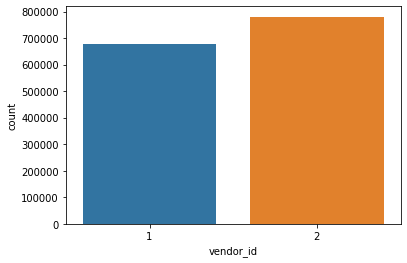

In [ ]:
sns.countplot(x=df["vendor_id"])

Passenger count

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

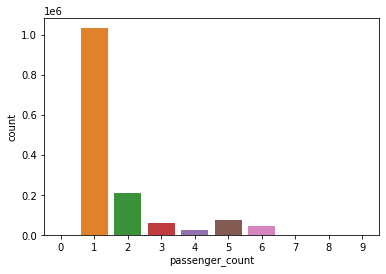

In [ ]:
sns.countplot(x=df["passenger_count"])

store_and_fwd_flag

<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='count'>

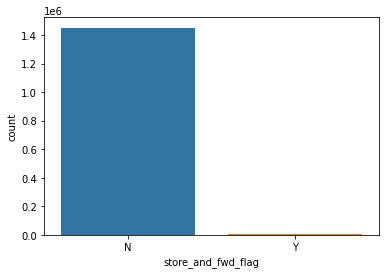

In [ ]:
sns.countplot(x=df["store_and_fwd_flag"])

trip_duration

gurgaon
sec53
sec30
3rd 19thjune
Mansi

In [ ]:
df['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [ ]:
max(df['trip_duration'])/3600

979.5227777777778

In [ ]:
1075/60

17.916666666666668

In [ ]:
df['trip_duration'].quantile(0.99855)/3600

2.937195263888894

In [ ]:
(df['trip_duration']/3600>2).sum()

2253

In [ ]:
 df.drop(df[df.trip_duration/3600>2].index, inplace=True)

<Axes: >

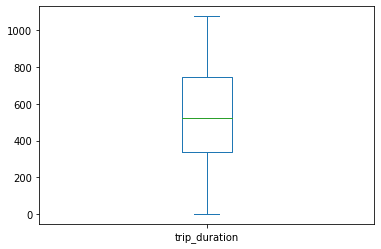

In [ ]:
df['trip_duration'].plot(kind='box') 

In [ ]:
IQR=df['trip_duration'].quantile(0.75)-df['trip_duration'].quantile(0.75)
UL=df['trip_duration'].quantile(0.75)+IQR*1.5
df.drop(df[df.trip_duration>UL].index, inplace=True)

In [ ]:
df.shape

(1094153, 10)

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [ ]:
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df['dropoff_datetime'].dt.year.unique()

array([2016])

[3 6 4 1 5 2 7]


<AxesSubplot:xlabel='dropoff_datetime', ylabel='count'>

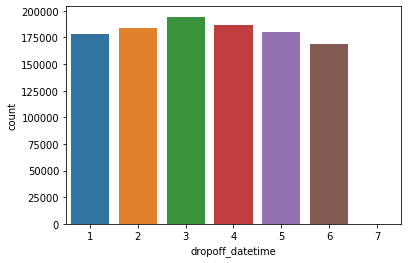

In [ ]:
print(df['dropoff_datetime'].dt.month.unique())
sns.countplot(x=df['dropoff_datetime'].dt.month)

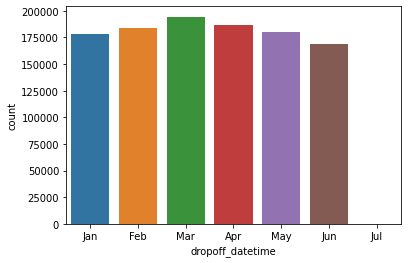

In [ ]:
ax=sns.countplot(x=df['dropoff_datetime'].dt.month)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])  # set 4 tick locations
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"])
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load example data
tips = sns.load_dataset("tips")

# Create countplot
ax = sns.countplot(x="day", data=tips)

# Set x-label and x-tick labels
ax.set_xlabel("Day of the Week")
ax.set_xticks([0, 1, 2, 3])  # set 4 tick locations
ax.set_xticklabels(["Thu", "Fri", "Sat", "Sun"])

# Show plot
plt.show()

<AxesSubplot:xlabel='dropoff_datetime', ylabel='count'>

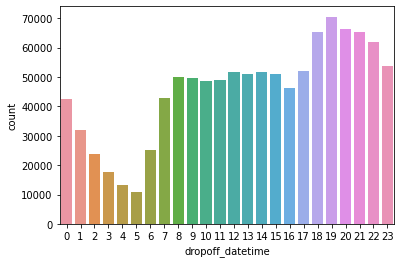

In [ ]:
sns.countplot(x=df['dropoff_datetime'].dt.hour, )

1. mostly people travel in night 6pm to 12pm.
2. Trafic is just constant from 9am to 5pm. It may be because of office hours.

In [ ]:
df['dropoff_datetime'].dt.hour.unique()

array([17,  0, 19, 13, 22, 23, 21, 15,  9,  2, 12,  3,  7,  1,  8, 14, 16,
       11, 20, 18, 10,  5,  6,  4])

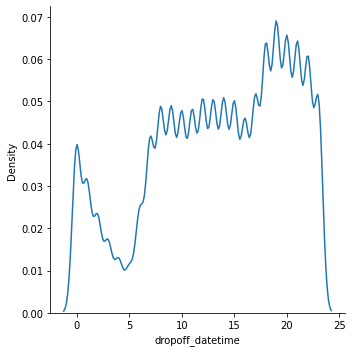

In [ ]:
sns.displot(df['dropoff_datetime'].dt.hour,kind='kde')

Datetime 
1. This data is for year 2016 olny.
2. It has just month from Jan to Jul

## Feature Enginneering

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Captstone project/NYC Taxi Data.csv')

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 0)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)

In [ ]:
df.shape

(1458644, 10)

In [ ]:
df.head(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,month
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,17,3
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,6


In [ ]:
y=df['trip_duration']
df.drop(['trip_duration'], axis=1, inplace=True)
X=df

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.004518623793102083

In [ ]:
r2_score(y_train, y_train_pred)

0.0018616876013415329

<AxesSubplot:>

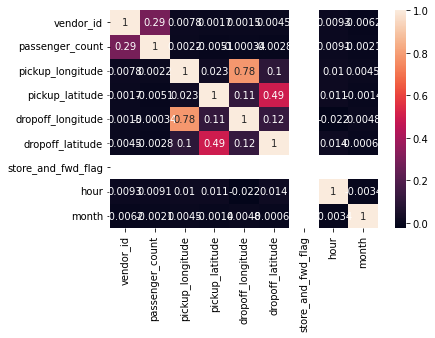

In [ ]:
corr=X.corr()
sns.heatmap(corr, annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def my_train_test_split(df, scaler_='StandardScaler'):
  y=df['trip_duration']
  X=df[[c for c in df.columns.tolist() if c!='trip_duration']]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  if scaler_=='MinMax':
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
  else:
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
  return X_train, X_test, y_train, y_test

# def performance(X_train, X_test, y_train, y_test):
#     mse_train=mean_squared_error(y_train, model.predict(X_train))
#     mse_test=mean_squared_error(y_test, model.predict(X_test))
#     r2_train=r2_score(y_train, model.predict(X_train))
#     r2_test=r2_score(y_test, model.predict(X_test))  


#     print(f"RMSE of train dataset", mse_train)
#     print(f"RMSE of test dataset", mse_test)
#     print(f"RMSE of train dataset", r2_test)
#     print(f"RMSE of test dataset", r2_train)

def model(algo):
  X_train, X_test, y_train, y_test=my_train_test_split(df)
  if algo=='Linear Regression':
    model = LinearRegression()
    model.fit(X_train, y_train)
  elif algo=='Decision Tree':
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

  elif algo=='KNN':
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)

  elif algo=='SVR':
    model = SVR()
    model.fit(X_train, y_train)

  else:
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
  

  mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
  mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
  r2_train=r2_score(y_train, model.predict(X_train))
  r2_test=r2_score(y_test, model.predict(X_test))  


  print(f"RMSE of train dataset", mse_train)
  print(f"RMSE of test dataset", mse_test)
  print(f"R2_score of train dataset", r2_test)
  print(f"R2_score of test dataset", r2_train)



In [ ]:
model_name=['Linear Regression', 'Decision Tree', 'KNN', 'SVM', 'Random Forest']

In [ ]:
y=df['trip_duration']
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_train)

array([508.08946439, 542.04113804, 553.93951942, ..., 537.0196459 ,
       552.05368964, 536.41979955])

In [ ]:
model('Linear Regression')

In [ ]:
from datetime import datetime
datetime.now()

datetime.datetime(2023, 3, 29, 17, 15, 43, 830180)

In [ ]:
for algorithm in model_name:
  start_time=datetime.now()
  print(algorithm)
  model(algorithm)
  print(f"Time taken: {datetime.now()-start_time}3")

Linear Regression
RMSE of train dataset 256.6990553557813
RMSE of test dataset 257.1466260876857
R2_score of train dataset 0.007569386220805274
R2_score of test dataset 0.010006881777723686
Time taken: 0:00:01.9209613
Decision Tree
RMSE of train dataset 1.426462834301505
RMSE of test dataset 212.51819485955346
R2_score of train dataset 0.3221544827978198
R2_score of test dataset 0.9999694293582009
Time taken: 0:00:17.1488673
KNN
RMSE of train dataset 148.60871186699345
RMSE of test dataset 183.34247815142513
R2_score of train dataset 0.4954959162596825
R2_score of test dataset 0.6682032144829018
Time taken: 0:15:09.2645193
SVM
RMSE of train dataset 55.86632621588951
RMSE of test dataset 149.66907087031413
R2_score of train dataset 0.6637962007612421
R2_score of test dataset 0.9531096082967843
Time taken: 0:18:30.6133773
Random Forest
RMSE of train dataset 55.84797290940713
RMSE of test dataset 149.66265406436273
R2_score of train dataset 0.6638250284713476
R2_score of test dataset 0.95

# Outlier treatment

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/NYC Taxi Data.csv')

In [ ]:
df=data.copy()

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 0)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)

no of observations before outlier removal of trip duration 1458644
no of observations before after removal of trip duration 1094153


<Axes: >

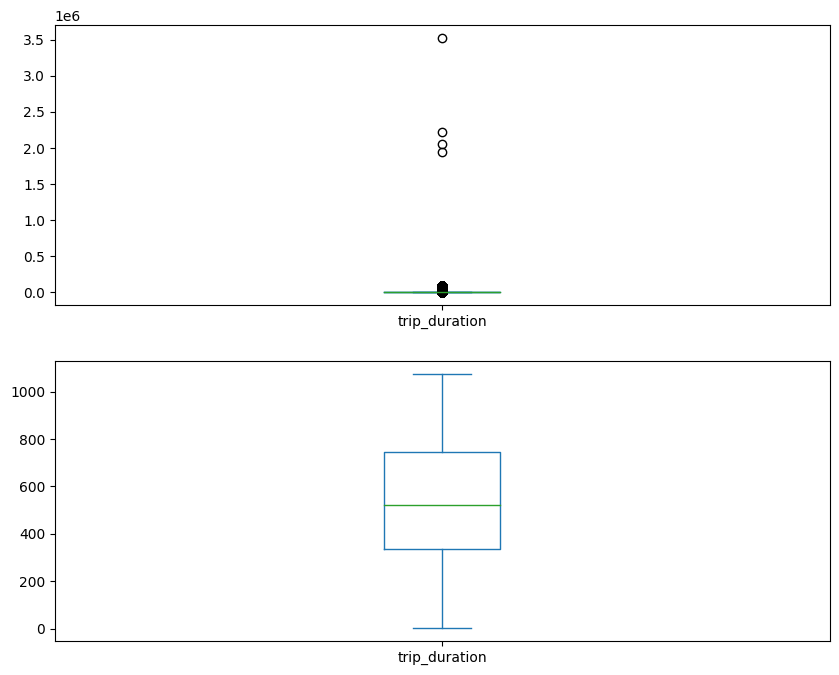

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
print(f'no of observations before outlier removal of trip duration {df.shape[0]}')
df['trip_duration'].plot(kind='box')

IQR=df['trip_duration'].quantile(0.75)-df['trip_duration'].quantile(0.75)
UL=df['trip_duration'].quantile(0.75)+IQR*1.5
df.drop(df[df.trip_duration>UL].index, inplace=True)

plt.subplot(2,1,2)
print(f'no of observations before after removal of trip duration {df.shape[0]}')
df['trip_duration'].plot(kind='box')

In [ ]:
# Box plot
numeric_columns=[c for c in df.columns if c not in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']]
numeric_columns

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'trip_duration',
 'hour',
 'month']

In [ ]:
import numpy as np
for i, column in enumerate(numeric_columns):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-3) | (3<df[f'{column}+_cleaned'])].index.to_list(), inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)

In [ ]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,month
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,17,3
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,6
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,19,4
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,13,3
5,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,22,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def my_train_test_split(df, scaler_='StandardScaler'):
  y=df['trip_duration']
  X=df[[c for c in df.columns.tolist() if c!='trip_duration']]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  if scaler_=='MinMax':
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
  else:
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
  return X_train, X_test, y_train, y_test

# def performance(X_train, X_test, y_train, y_test):
#     mse_train=mean_squared_error(y_train, model.predict(X_train))
#     mse_test=mean_squared_error(y_test, model.predict(X_test))
#     r2_train=r2_score(y_train, model.predict(X_train))
#     r2_test=r2_score(y_test, model.predict(X_test))  


#     print(f"RMSE of train dataset", mse_train)
#     print(f"RMSE of test dataset", mse_test)
#     print(f"RMSE of train dataset", r2_test)
#     print(f"RMSE of test dataset", r2_train)

def model(algo):
  X_train, X_test, y_train, y_test=my_train_test_split(df)
  if algo=='Linear Regression':
    model = LinearRegression()
    model.fit(X_train, y_train)
  elif algo=='Decision Tree':
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

  elif algo=='KNN':
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)

  elif algo=='SVR':
    model = SVR()
    model.fit(X_train, y_train)

  else:
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
  

  mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
  mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
  r2_train=r2_score(y_train, model.predict(X_train))
  r2_test=r2_score(y_test, model.predict(X_test))  


  print(f"RMSE of train dataset", mse_train)
  print(f"RMSE of test dataset", mse_test)
  print(f"R2_score of train dataset", r2_test)
  print(f"R2_score of test dataset", r2_train)



In [ ]:
model_name=['Linear Regression', 'Decision Tree', 'KNN', 'SVM', 'Random Forest']

In [ ]:
y=df['trip_duration']
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_train)

array([544.49417123, 522.24615713, 526.81079288, ..., 520.60065676,
       637.78391422, 567.87987619])

In [ ]:
for algorithm in model_name:
  start_time=datetime.now()
  print(algorithm)
  model(algorithm)
  print(f"Time taken: {datetime.now()-start_time}3")

Linear Regression
RMSE of train dataset 253.70508790797737
RMSE of test dataset 253.99740750882688
R2_score of train dataset 0.014468264411265142
R2_score of test dataset 0.014646634786307011
Time taken: 0:00:00.6144973
Decision Tree
RMSE of train dataset 0.6653165380031385
RMSE of test dataset 212.40635980175534
R2_score of train dataset 0.3107971285750569
R2_score of test dataset 0.999993223736454
Time taken: 0:00:13.7054363
KNN
RMSE of train dataset 141.3159656553395
RMSE of test dataset 173.96939326037804
R2_score of train dataset 0.5376639656076582
R2_score of test dataset 0.6942854480587557
Time taken: 0:07:36.0887753
SVM
RMSE of train dataset 55.972224634895106
RMSE of test dataset 149.89989448405942
R2_score of train dataset 0.6567467165461554
R2_score of test dataset 0.9520400427468204
Time taken: 0:14:01.2642943
Random Forest
RMSE of train dataset 55.92622386155646
RMSE of test dataset 149.8365114591684
R2_score of train dataset 0.6570369346518601
R2_score of test dataset 0.9